# COMP 6934 - Assignment 5


Name: Mohammad Shehabul Islam

ID: 202196528

# Question 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('births.csv')

df[['hour', 'minute']] = df['time'].str.split(':', expand=True)
df['hour'] = df['hour'].astype(int)
df['minute'] = df['minute'].astype(int)
df['total_minutes'] = (df['hour'] * 60) + df['minute'] + 1
df['total_minutes'] = (df['total_minutes'] - 1) % 1440 + 1

births_per_minute = df.groupby('total_minutes').size().reset_index(name='births_count')
df = df.merge(births_per_minute, on='total_minutes', how='left')
# df['avg_birth'] = (df['births_count']/df['births_count'].max()*10).round(2)
df['avg_birth'] = df['births_count'].mean()
# avg_line= df['births_count'].mean()
# df['Avg_line'] = avg_line
df['time_rad'] = ((df['hour'] + df['minute'] / 60) / 24) * (2 * np.pi)
df.head(3)

,year,month,time,hour,minute,total_minutes,births_count,avg_birth,time_rad
0,2022,1,12:18,12,18,739,3259,2708.364006,3.220132
1,2022,1,15:25,15,25,926,2853,2708.364006,4.036074
2,2022,1,05:39,5,39,340,1752,2708.364006,1.479167


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675635 entries, 0 to 3675634
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   year           int64  
 1   month          int64  
 2   time           object 
 3   hour           int32  
 4   minute         int32  
 5   total_minutes  int32  
 6   births_count   int64  
 7   avg_birth      float64
 8   time_rad       float64
dtypes: float64(2), int32(3), int64(3), object(1)
memory usage: 210.3+ MB


In [4]:
df.describe()

,year,month,hour,minute,total_minutes,births_count,avg_birth,time_rad
count,3675635.0,3.675635e+06,3.675635e+06,3.675635e+06,3.675635e+06,3.675635e+06,3.675635e+06,3.675635e+06
mean,2022.0,6.602299e+00,1.193906e+01,2.945350e+01,7.467972e+02,2.708364e+03,2.708364e+03,3.254154e+00
std,0.0,3.426761e+00,6.363871e+00,1.737218e+01,3.821060e+02,6.646018e+02,1.364242e-11,1.667252e+00
min,2022.0,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.675000e+03,2.708364e+03,0.000000e+00
25%,2022.0,4.000000e+00,7.000000e+00,1.400000e+01,4.760000e+02,2.111000e+03,2.708364e+03,2.072578e+00
50%,2022.0,7.000000e+00,1.200000e+01,2.900000e+01,7.540000e+02,2.843000e+03,2.708364e+03,3.285582e+00
75%,2022.0,1.000000e+01,1.700000e+01,4.500000e+01,1.054000e+03,3.090000e+03,2.708364e+03,4.594579e+00
max,2022.0,1.200000e+01,2.300000e+01,5.900000e+01,1.440000e+03,4.997000e+03,2.708364e+03,6.278822e+00


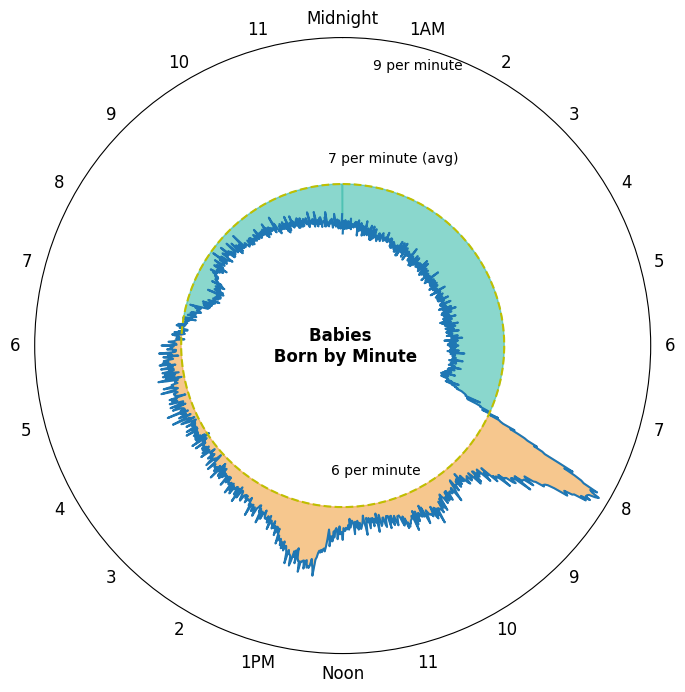

In [5]:
df = df.sort_values(by='time_rad')

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')

ax.plot(df['time_rad'], df['births_count'], '-')

avg_value = df['avg_birth'].iloc[0] 

avg_line_theta = np.linspace(0, 2*np.pi, 100) 
avg_line_radius = [avg_value]*100  

ax.plot(avg_line_theta, avg_line_radius, 'y--')  

ticks = np.linspace(0, 2*np.pi, 24, endpoint=False)
tick_labels = ['Midnight', '1AM', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
               'Noon', '1PM', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels, fontsize=10)

special_ticks = ['1AM', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
indices = [tick_labels.index(label) for label in special_ticks]

special_ticks_rad = np.array(ticks)[indices]

ax.grid(False)
ax.set_yticklabels([])
ax.set_xticklabels(tick_labels, fontsize=12)
ax.text(0, 0, 'Babies \n Born by Minute', ha='center', va='center', fontsize=12, fontweight='bold')

ax.text(special_ticks_rad[-1], avg_line_radius[7] * 0.8, '6 per minute', ha='center', va='center', fontsize=10)
ax.text(special_ticks_rad[0], avg_line_radius[11] * 1.2, '7 per minute (avg)', ha='center', va='center', fontsize=10)
ax.text(special_ticks_rad[0], avg_line_radius[7] * 1.8, '9 per minute', ha='center', va='center', fontsize=10)


below_avg_color = '#17b09c'  
above_avg_color = '#ef901e'  


ax.fill_between(df['time_rad'], df['births_count'], avg_value, where=(df['births_count'] < avg_value),
                color=below_avg_color, alpha=0.5)
ax.fill_between(df['time_rad'], df['births_count'], avg_value, where=(df['births_count'] >= avg_value),
                color=above_avg_color, alpha=0.5)

plt.show()


# Question 2

In [6]:
df_console = pd.read_csv('consoles.csv')
df_console.head()

,Platform,Type,Company,Released,Units sold
0,Color TV-Game,Dedicated,Nintendo,1977,3000000
1,Game & Watch,Dedicated handheld,Nintendo,1980,43400000
2,NES/Famicom,Home,Nintendo,1983,61910000
3,Famicom Disk System,Home console add-on,Nintendo,1986,4500000
4,Game Boy & Game Boy Color,Handheld,Nintendo,1989,118690000


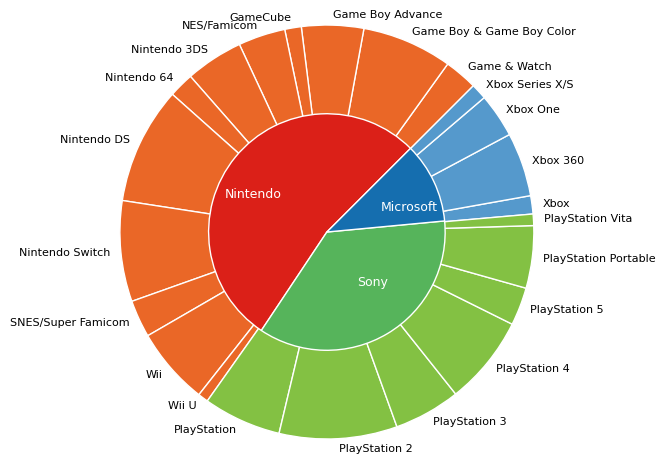

In [7]:
df_console = pd.read_csv('consoles.csv')

inner_color = ['#156eaf', '#db2018', '#56b45b']
outer_colors = ['#5599cc', '#ea6727', '#83c143']

comp_col_map = {'Microsoft': inner_color[0],
                     'Nintendo': inner_color[1],
                     'Sony': inner_color[2]}

comp_col_map_outer = {'Microsoft': outer_colors[0],
                           'Nintendo': outer_colors[1],
                           'Sony': outer_colors[2]}

df_console['Company_Color'] = df_console['Company'].map(comp_col_map)
nintendo_smallest_consoles = df_console[df_console['Company'] == 'Nintendo'].nsmallest(4, 'Units sold')['Platform']
outer_ring = df_console[~df_console['Platform'].isin(nintendo_smallest_consoles)]
outer_ring = outer_ring.groupby(['Company', 'Platform'], as_index=False).sum(numeric_only=True)
outer_ring['Color'] = outer_ring['Company'].map(comp_col_map_outer)

inner_names = df_console['Company'].unique()
inner_sizes_dict = df_console.groupby('Company')['Units sold'].sum().to_dict()
new_order = ['Nintendo', 'Sony', 'Microsoft']

inner_sizes = [inner_sizes_dict[company] for company in new_order]
inner_colors_ordered = [comp_col_map[company] for company in new_order]

outer_names = outer_ring['Platform'].tolist()
outer_sizes = outer_ring['Units sold'].tolist()
outer_colors_ordered = outer_ring['Color'].tolist()

fig, ax = plt.subplots()
ax.axis('equal')

wedges, texts = ax.pie(outer_sizes,
                       radius=1.4,
                       colors=outer_colors_ordered,
                       startangle=5,
                       labels=outer_names,
                       labeldistance=1.05,
                       rotatelabels=False,
                       textprops={'fontsize': 8})

for wedge in wedges:
    wedge.set_edgecolor('white')

wedges, label_texts = ax.pie(inner_sizes,
                             radius=0.8,
                             colors=inner_colors_ordered,
                             startangle=45,
                             labels=inner_names,
                             labeldistance=0.5,
                             rotatelabels=False)

for wedge in wedges:
    wedge.set_edgecolor('white')

for text in label_texts:
    text.set_color('white')
    text.set_fontsize(9)


plt.show()